In [39]:
import pandas as pd
k = pd.read_excel("/content/GRN_source_Target_TFS.xls")

Making directed graph with no cycles first



In [40]:
k

Unnamed: 0      TF  Target Mode of Regulation References
0              6    ABL1    BCL2         Repression   11753601
1             34     AHR     FOS            Unknown   10478842
2             56     APC   BIRC5            Unknown   11751382
3            104      AR   ERBB2         Activation   21613411
4            105      AR   ERBB2            Unknown   21741601
...          ...     ...     ...                ...        ...
1470        9384  ZNF382   NFKB1         Repression   20682794
1471        9385  ZNF382   STAT3         Repression   20682794
1472        9386  ZNF382  STAT5B         Repression   20682794
1473        9387  ZNF383     JUN         Repression   15964543
1474        9389  ZNF423   BRCA1            Unknown   23764426

[1475 rows x 5 columns]

In [104]:
k.loc[0,'Mode of Regulation']

'Repression'

In [41]:
hj = k.drop('References',axis='columns')
hj

Unnamed: 0      TF  Target Mode of Regulation
0              6    ABL1    BCL2         Repression
1             34     AHR     FOS            Unknown
2             56     APC   BIRC5            Unknown
3            104      AR   ERBB2         Activation
4            105      AR   ERBB2            Unknown
...          ...     ...     ...                ...
1470        9384  ZNF382   NFKB1         Repression
1471        9385  ZNF382   STAT3         Repression
1472        9386  ZNF382  STAT5B         Repression
1473        9387  ZNF383     JUN         Repression
1474        9389  ZNF423   BRCA1            Unknown

[1475 rows x 4 columns]

In [42]:
hj = hj.drop('Unnamed: 0',axis='columns')
hj

TF  Target Mode of Regulation
0       ABL1    BCL2         Repression
1        AHR     FOS            Unknown
2        APC   BIRC5            Unknown
3         AR   ERBB2         Activation
4         AR   ERBB2            Unknown
...      ...     ...                ...
1470  ZNF382   NFKB1         Repression
1471  ZNF382   STAT3         Repression
1472  ZNF382  STAT5B         Repression
1473  ZNF383     JUN         Repression
1474  ZNF423   BRCA1            Unknown

[1475 rows x 3 columns]

In [43]:
f = hj.drop_duplicates(subset= ["TF","Target","Mode of Regulation"])
f

TF  Target Mode of Regulation
0       ABL1    BCL2         Repression
1        AHR     FOS            Unknown
2        APC   BIRC5            Unknown
3         AR   ERBB2         Activation
4         AR   ERBB2            Unknown
...      ...     ...                ...
1470  ZNF382   NFKB1         Repression
1471  ZNF382   STAT3         Repression
1472  ZNF382  STAT5B         Repression
1473  ZNF383     JUN         Repression
1474  ZNF423   BRCA1            Unknown

[1398 rows x 3 columns]

In [44]:
f = f.reset_index(drop=True)
X4=f['TF']
Y4=f['Target']
h4=pd.concat([X4,Y4],axis=0,ignore_index=True)
f

TF  Target Mode of Regulation
0       ABL1    BCL2         Repression
1        AHR     FOS            Unknown
2        APC   BIRC5            Unknown
3         AR   ERBB2         Activation
4         AR   ERBB2            Unknown
...      ...     ...                ...
1393  ZNF382   NFKB1         Repression
1394  ZNF382   STAT3         Repression
1395  ZNF382  STAT5B         Repression
1396  ZNF383     JUN         Repression
1397  ZNF423   BRCA1            Unknown

[1398 rows x 3 columns]

In [89]:
X=k['TF']
Y=k['Target']
h=pd.concat([X,Y],axis=0,ignore_index=True)
X

0         ABL1
1          AHR
2          APC
3           AR
4           AR
         ...  
1470    ZNF382
1471    ZNF382
1472    ZNF382
1473    ZNF383
1474    ZNF423
Name: TF, Length: 1475, dtype: object

making unqiue list to set vertices

In [45]:
list_set = set(h4)
unique_list = (list(list_set))

In [46]:
len(unique_list)

417

Converting string to integers

In [ ]:
n = []*len(X4)
g = []*len(X4)
for i in range(0,len(X4)):
      for j in range(0,len(unique_list)):
        if(X4[i] == unique_list[j]):
              n.append(j)
        if(Y4[i] == unique_list[j]):
              g.append(j)
for i in range(0,len(n)):
       print(str(n[i]) +" " + str(g[i]))    

to remove the cycles algorithm is use which is in different folder so now reading the file which have all edges after removing cycles

to remove edge i have taken help from 
https://link.springer.com/article/10.1023/A:1011315014322

In [48]:
n = pd.read_csv('/content/removeCycles_removed_by_mfas.edges', delimiter = " ",names= ['TF','Target'],index_col=False) 

In [49]:
X1=n['TF']
Y1=n['Target']

In [50]:
X1

0       91
1      276
2      377
3      253
4      253
      ... 
134    293
135    356
136    377
137    161
138    332
Name: TF, Length: 139, dtype: int64

In [ ]:
# unique = [None] * 417
# for i in range(0,len(unique_list)):
#   unique[i]=Node(unique_list[i],name=unique_list[i])
   

In [ ]:
# from pomegranate import BayesianNetwork
# model = BayesianNetwork("hut")

In [ ]:
# for i in range(0,len(unique_list)):
#   model.add_nodes(unique[i])
  

In [ ]:

# for i in range(0,len(X)):
#   p=0
#   b=0
#   for j in range(0,len(unique_list)):
#     if(X[i] == unique_list[j]):
#       p=j
#     if(Y[i] == unique_list[j]):
#       b=j
#   model.add_edge(unique[p],unique[b])

In [ ]:
# model.bake()

In [ ]:
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt
# import pylab

# G = nx.DiGraph(directed=True)

In [51]:
len(X4)

1398

In [52]:
t = []
for i in range(0,len(X4)):
     t.append({i :(X4[i],Y4[i])})  

In [53]:
len(t)

1398

using networkx to make graph

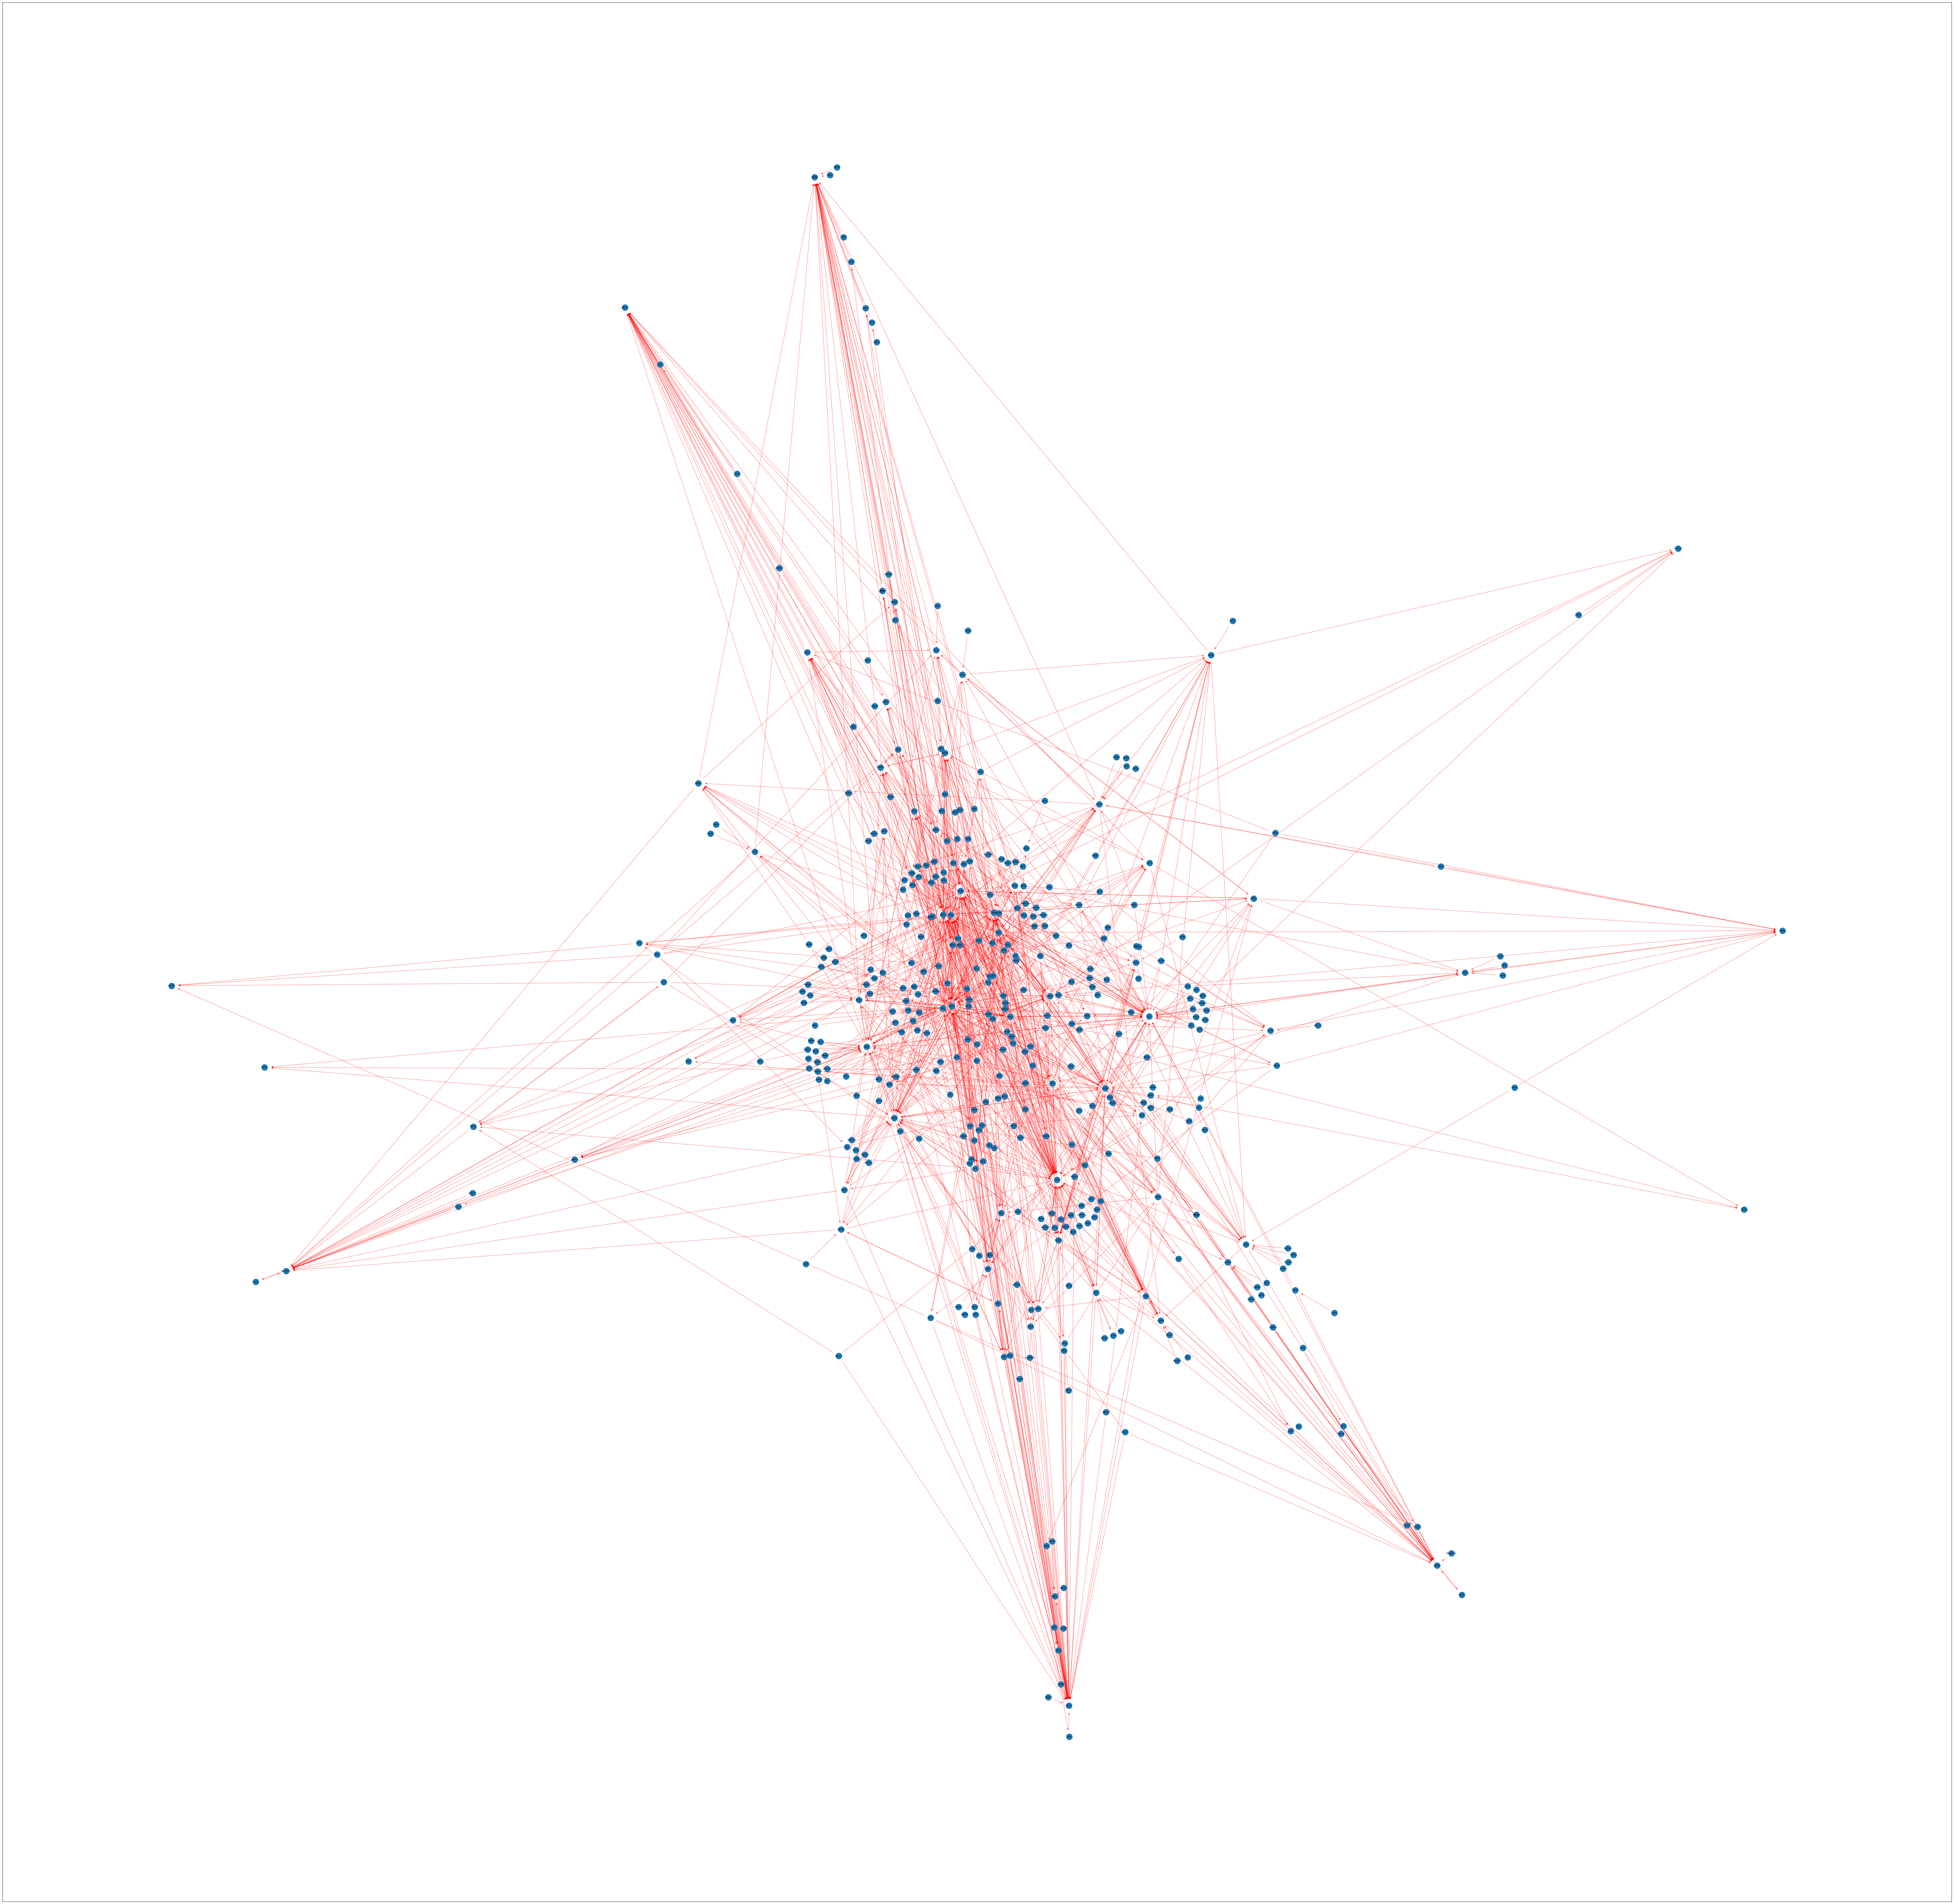

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for i in range(0,len(unique_list)):
      G.add_node(unique_list[i])
mn=0
for i in range(0,len(X4)):
       G.add_edge(X4[i],Y4[i])
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos,font_size=6)
nx.draw_networkx_edges(G, pos, edge_color='r',alpha=0.5,width=1,arrows=True,node_size=1500,min_source_margin=0.0,min_target_margin=0.5)

plt.rcParams["figure.figsize"] = (100 , 100)
# plt.show()

In [18]:
len(G.edges)

1204

In [54]:
len(X1)

139

In [55]:
n = []*len(X1)
g = []*len(Y1)
for i in range(0,len(X1)):
    n.append(unique_list[int(X1[i])])
    g.append(unique_list[int(Y1[i])])

# for i in range(0,len(n)):
#    print(str(n[i]) +" " + str(g[i])) 
no = []
for i in range(0,len(X1)):
    ans = (n[i],g[i])
    for j in t:
        for key,value in j.items():
            if(ans == value):
                no.append(j)
                break


In [ ]:
no

In [57]:
len(no)

167

In [58]:
for i in no:
  t.remove(i) 

In [59]:
len(t)

1231

In [60]:
hello = {'TF': [] , 'Target': [] , 'Mode of Regulation' : []}
for i in t:
    for key,value in i.items():
        hello['TF'].append(value[0])
        hello['Target'].append(value[1])
        hello['Mode of Regulation'].append(f.loc[key,'Mode of Regulation'])

In [61]:
columns = ['TF', 'Target','Mode of Regulation']
df = pd.DataFrame(hello, columns=columns)
df

TF  Target Mode of Regulation
0       ABL1    BCL2         Repression
1        AHR     FOS            Unknown
2        APC   BIRC5            Unknown
3         AR   ERBB2         Activation
4         AR   ERBB2            Unknown
...      ...     ...                ...
1226  ZNF382   NFKB1         Repression
1227  ZNF382   STAT3         Repression
1228  ZNF382  STAT5B         Repression
1229  ZNF383     JUN         Repression
1230  ZNF423   BRCA1            Unknown

[1231 rows x 3 columns]

In [ ]:
jk = df.drop_duplicates(subset= ["TF","Target","Mode of Regulation"])
jk

storing edges having no cycle

In [68]:
jk.to_csv('data1.csv')

In [79]:
!pip install pgmpy


In [80]:
import pandas as pd
jk = pd.read_csv('/content/data1.csv')
jk=jk.drop('Unnamed: 0',axis='columns')
jkTF = jk['TF']
jkTarget = jk['Target']
jkTOR = jk['Mode of Regulation']
jkTOR

0       Repression
1          Unknown
2          Unknown
3       Activation
4          Unknown
           ...    
1226    Repression
1227    Repression
1228    Repression
1229    Repression
1230       Unknown
Name: Mode of Regulation, Length: 1231, dtype: object

In [81]:
from pgmpy.models import BayesianModel
a = jk['TF']
b = jk['Target']
list1 = []

for i in range(0,len(a)):
    list1.append((a[i],b[i]))

cancer_model = BayesianModel(list1)
cancer_model

In [82]:
check = pd.read_excel('/content/GRN_source_target_network_analyze.xls')
check

SUID    name  BetweennessCentrality  ...  SelfLoops  shared name  Stress
0    7228    TP53               0.066113  ...          0         TP53   39572
1    6788      AR               0.036050  ...          0           AR   20498
2    7029     MYC               0.033421  ...          0          MYC   19140
3    6795    ESR1               0.028847  ...          0         ESR1   16236
4    7044   NFKB1               0.026836  ...          0        NFKB1   17459
..    ...     ...                    ...  ...        ...          ...     ...
412  8656   ZNF24               0.000000  ...          0        ZNF24       0
413  8658  ZNF300               0.000000  ...          0       ZNF300       0
414  8660  ZNF382               0.000000  ...          0       ZNF382       0
415  8667  ZNF383               0.000000  ...          0       ZNF383       0
416  8669  ZNF423               0.000000  ...          0       ZNF423       0

[417 rows x 17 columns]

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for i in range(0,len(unique_list)):
    G.add_node(unique_list[i])
mn=0
for i in range(0,len(a)):
    G.add_edge(a[i],b[i])

In [122]:
un = [0]*417
for i in G.in_degree:
    key,value = i
    ans=-1
    for j in range(0,417):
        if(unique_list[j] == key):
            ans=j
    un[ans] = value  



In [123]:
len(un)

417

In [ ]:
inp = [-1]*417
name = check['name']
for i in range(0,len(name)):
    for j in range(0,len(unique_list)):
        if(name[i] == unique_list[j]):
            inp[i] = un[j]
            print(inp[i])
            break 


In [127]:
check['indeg'] = inp

In [130]:
un[332]

43

In [128]:
check

SUID    name  BetweennessCentrality  ...  shared name  Stress  indeg
0    7228    TP53               0.066113  ...         TP53   39572     43
1    6788      AR               0.036050  ...           AR   20498     45
2    7029     MYC               0.033421  ...          MYC   19140     74
3    6795    ESR1               0.028847  ...         ESR1   16236     23
4    7044   NFKB1               0.026836  ...        NFKB1   17459     32
..    ...     ...                    ...  ...          ...     ...    ...
412  8656   ZNF24               0.000000  ...        ZNF24       0      0
413  8658  ZNF300               0.000000  ...       ZNF300       0      0
414  8660  ZNF382               0.000000  ...       ZNF382       0      0
415  8667  ZNF383               0.000000  ...       ZNF383       0      0
416  8669  ZNF423               0.000000  ...       ZNF423       0      0

[417 rows x 18 columns]

In [132]:
check1 = check['name']

Making model which will have clossness centrality and mode of regulation in the way that if mode of regulation is activation(1) it will check the probabilty of clossness centrality at true else if it will have repression(0),it will have clossness centrality at false and if it is unknown ,clossness centrality will be  0 and 1 at  true and false 


for conditional probabilty taking help from 
https://www.intechopen.com/books/bayesian-inference/converting-graphic-relationships-into-conditional-probabilities-in-bayesian-network


to check the cascade effect probabilities are assign in this way that if we want probability of child it has to check mode of regulation of its all parent and that parent has to see mode of regulation of its parent and then have to calculate probabilty of child

for cascading effect I have read from this link
https://www.cs.cmu.edu/~neill/papers/cascade.pdf


In [131]:
from pgmpy.factors.discrete import TabularCPD
nodes = [0]*417
ans=-1

for h in range(0,417):
  if(check.loc[h,'indeg'] == 0):
      for i in range(0,len(jkTF)):
        if(jkTF[i] == check.loc[h,'name']):
          ans=i    
      if(jkTOR[ans] == 'Repression'):
        nodes[h] = TabularCPD(variable=check.loc[h,'name'] , variable_card=2,values=[[1-check.loc[h,'ClosenessCentrality']], [check.loc[h,'ClosenessCentrality']]])
      else:
          if(jkTOR[ans] == 'Activation'):
            nodes[h] = TabularCPD(variable=check.loc[h,'name'] , variable_card=2,values=[[check.loc[h,'ClosenessCentrality']],[1- check.loc[h,'ClosenessCentrality']]])
          else:
            nodes[h] = TabularCPD(variable=check.loc[h,'name'] , variable_card=2,values=[[0],[1]])
            

In [139]:
c = jk['Mode of Regulation']
for h in range(0,417):
  if(check.loc[h,'indeg'] > 0):
    value = []
    evidence1 = []
    evidence_card1 = []
    for i in range(0,len(b)):
        l=0
        if(check.loc[h,'name'] == b[i]):
            evidence1.append(a[i])
            evidence_card1.append(2)
            for l in range(0,417):
                if(check1[l] == a[i]):
                    ans=l
            if(c[i] == 'Repression'):
                r= check.loc[h,'ClosenessCentrality'] + check.loc[ans,'ClosenessCentrality']
                value.append([1-r,r])
            else:
                if(c[i] == 'Activation'):
                    r =check.loc[h,'ClosenessCentrality'] + check.loc[ans,'ClosenessCentrality']
                    value.append([r,1-r])
                else:
                    r =check.loc[h,'ClosenessCentrality'] + check.loc[ans,'ClosenessCentrality']
                    value.append([0,1])
    nodes[h] = TabularCPD(variable=check.loc[h,'name'] ,variable_card = 2,values=value,evidence = evidence1,evidence_card =evidence_card1)                   

        

In [139]:
# Associating the parameters with the model structure.
for i in nodes:
    cancer_model.add_cpds(i)

# Checking if the cpds are valid for the model.
cancer_model.check_model()

In [ ]:
infer = SimpleInference(cancer_model)
a = infer.query(var=['ERBB2'], evidence=[('AR', 1)])

The probability of ERBB2 to get ON while AR is ON will be calculated by checking the probability of AR to get on which is given by some calculation of clossness cardinality so if AR clossness cardinality will be greater which mean it has shortest distance with its child (ERBB2) then mode of regulation will be seen if that is activation, the probability will be high to get ERBB2 to get on else it will be low
 

In [ ]:
b = infer.query(var=['ATM'], evidence=[('ARNT', 0),('CTBP1',1)])
print(b)

The probabilty of ATM to get OFF if ARNT is OFF and CTBP1 is ON will be check the same way as first one is check ,mode fo regulation and cardinality will be check to get the probabilty of ATM

In [ ]:
# def find_all_cycles(G, source=None, cycle_length_limit=None):
#     """forked from networkx dfs_edges function. Assumes nodes are integers, or at least
#     types which work with min() and > ."""
#     if source is None:
#         # produce edges for all components
#         nodes=[list(i)[0] for i in nx.connected_components(G)]
#     else:
#         # produce edges for components with source
#         nodes=[source]
#     # extra variables for cycle detection:
#     cycle_stack = []
#     output_cycles = set()
    
#     def get_hashable_cycle(cycle):
#         """cycle as a tuple in a deterministic order."""
#         m = min(cycle)
#         mi = cycle.index(m)
#         mi_plus_1 = mi + 1 if mi < len(cycle) - 1 else 0
#         if cycle[mi-1] > cycle[mi_plus_1]:
#             result = cycle[mi:] + cycle[:mi]
#         else:
#             result = list(reversed(cycle[:mi_plus_1])) + list(reversed(cycle[mi_plus_1:]))
#         return tuple(result)
    
#     for start in nodes:
#         if start in cycle_stack:
#             continue
#         cycle_stack.append(start)
        
#         stack = [(start,iter(G[start]))]
#         while stack:
#             parent,children = stack[-1]
#             try:
#                 child = next(children)
                
#                 if child not in cycle_stack:
#                     cycle_stack.append(child)
#                     stack.append((child,iter(G[child])))
#                 else:
#                     i = cycle_stack.index(child)
#                     if i < len(cycle_stack) - 2: 
#                       output_cycles.add(get_hashable_cycle(cycle_stack[i:]))
                
#             except StopIteration:
#                 stack.pop()
#                 cycle_stack.pop()
    
#     return [list(i) for i in output_cycles]
# find_all_cycles(G)    

In [ ]:
# import networkx as nx 
# import argparse
# import numpy as np

# import sys
# sys.setrecursionlimit(5500000)

# def dfs_visit_recursively(g,node,nodes_color,edges_to_be_removed):

#     nodes_color[node] = 1
#     nodes_order = list(g.successors(node))
#     nodes_order = np.random.permutation(nodes_order)
#     for child in nodes_order:
#       if nodes_color[child] == 0:
#           dfs_visit_recursively(g,child,nodes_color,edges_to_be_removed)
#       elif nodes_color[child] == 1:
#         edges_to_be_removed.append((node,child))

#     nodes_color[node] = 2

# def dfs_remove_back_edges(graph_file,nodetype = int):
# 	'''
# 	0: white, not visited 
# 	1: grey, being visited
# 	2: black, already visited
# 	'''

# 	g = G
# 	nodes_color = {}
# 	edges_to_be_removed = []
# 	for node in list(g.nodes()):
# 		nodes_color[node] = 0

# 	nodes_order = list(g.nodes())
# 	nodes_order = np.random.permutation(nodes_order)
# 	num_dfs = 0
# 	for node in nodes_order:

# 		if nodes_color[node] == 0:
# 			num_dfs += 1
# 			dfs_visit_recursively(g,node,nodes_color,edges_to_be_removed)

# 	# print("number of nodes to start dfs: %d" % num_dfs)
# 	# print("number of back edges: %d" % len(edges_to_be_removed))
# 	return edges_to_be_removed



# n = dfs_remove_back_edges(G)
# for i in n:
#   u,v = i
#   G.remove_edge(u, v)


# 	# parser = argparse.ArgumentParser()
# 	# parser.add_argument("-g","--graph_file",default= " ", help = "input graph file name (edges list)")
# 	# parser.add_argument("-t","--gt_edges_file",default = None, help = "ground truth edges file")
# 	# args = parser.parse_args()
# 	# graph_file = args.graph_file
	
# 	# print("graph_file %s " % graph_file)	
# 	# dfs_performance(graph_file,args.gt_edges_file)

In [ ]:
# len(G.edges)

980

In [ ]:
# list(nx.find_cycle(G))

NetworkXNoCycle: ignored

In [ ]:
# def _validate(G):
#     '''
#     Validates dependency graph to ensure it has no missing or cyclic dependencies
#     '''
#     for name in G.nodes():
#         if 'value' not in G.node[name] and 'template' not in G.node[name]:
#             msg = 'Dependency unsatisfied in variable "%s"' % name
#             raise ParamException(msg)

#     if not nx.is_directed_acyclic_graph(G):
#         graph_cycles = nx.simple_cycles(G)

#         variable_names = []
#         for cycle in graph_cycles:
#             try:
#                 variable_name = cycle[0]
#             except IndexError:
#                 continue

#             variable_names.append(variable_name)

#         variable_names = ', '.join(sorted(variable_names))
#         msg = ('Cyclic dependency found in the following variables: %s. Likely the variable is '
#                'referencing itself' % (variable_names))
#         raise ParamException(msg) 

In [ ]:
print(list(G.edges()))

[('ATF1', 'BCL2'), ('ATF1', 'ERBB2'), ('ATF1', 'TGFB2'), ('ATF1', 'GABPA'), ('ATF1', 'MITF'), ('PGR', 'BCL2'), ('PGR', 'ERBB2'), ('PGR', 'ESR1'), ('PGR', 'E2F1'), ('PGR', 'FOXP3'), ('PGR', 'MYC'), ('PGR', 'RELA'), ('CTBP1', 'BRCA1'), ('MAL', 'MMP9'), ('JUN', 'MMP9'), ('JUN', 'PGR'), ('JUN', 'AR'), ('JUN', 'BRCA1'), ('JUN', 'CREM'), ('JUN', 'ETS1'), ('JUN', 'ETS2'), ('JUN', 'JUN'), ('JUN', 'MYB'), ('JUN', 'MYC'), ('JUN', 'PPARA'), ('JUN', 'RUNX2'), ('JUN', 'TP53'), ('JUN', 'TP73'), ('JUN', 'VDR'), ('EHMT2', 'BIRC5'), ('EHMT2', 'RUNX3'), ('HCFC1', 'E2F1'), ('HCFC1', 'E2F4'), ('ZFHX3', 'MYB'), ('DACH1', 'FOS'), ('SATB1', 'BCL2'), ('SATB1', 'GATA3'), ('SATB1', 'HDAC1'), ('GATA3', 'ESR1'), ('GATA3', 'MUC1'), ('GATA3', 'GATA3'), ('GATA3', 'NFKB1'), ('GATA3', 'RELA'), ('GATA3', 'TCF7L2'), ('GATA3', 'ZEB1'), ('ETS2', 'EGR1'), ('ETS2', 'MMP9'), ('ETS2', 'MYC'), ('ETS2', 'TP53'), ('HOXA5', 'PGR'), ('TCF7', 'SNAI2'), ('MEF2C', 'JUN'), ('MEF2C', 'MECP2'), ('MEF2C', 'NR4A1'), ('ZNRD1', 'BCL2'), ('N

In [ ]:
# # # program to detect cycle
 
# # from collections import defaultdict
 
# # class Graph():
# #     def __init__(self,vertices):
# #         self.graph = defaultdict(list)
# #         self.V = vertices
 
# #     def addEdge(self,u,v):
# #         self.graph[u].append(v)

# #     def isCyclicUtil(self, v, visited, recStack):
 
# #         # Mark current node as visited and
# #         # adds to recursion stack
# #         visited[v] = True
# #         recStack[v] = True
 
# #         # Recur for all neighbours
# #         # if any neighbour is visited and in
# #         # recStack then graph is cyclic
# #         for neighbour in self.graph[v]:            
# #             if visited[neighbour] == False:
# #                 if self.isCyclicUtil(neighbour, visited, recStack) == True:
# #                     return True
# #             elif recStack[neighbour] == True:
# #                 return True
 
# #         # The node needs to be poped from
# #         # recursion stack before function ends
# #         recStack[v] = False
# #         return False
 
# #     # Returns true if graph is cyclic else false
# #     def isCyclic(self):
# #         visited = [False] * (self.V + 1)
# #         recStack = [False] * (self.V + 1)
# #         for node in range(self.V):
# #             if visited[node] == False:
# #                 if self.isCyclicUtil(node,visited,recStack) == True:
# #                     return True
# #         return False

# graph = {}
# for i in range(0,len(unique_list)):
#   graph[unique_list[i]] = []
#   for e in G.edges():
#       source,target = e
#       if(source == unique_list[i]):
#         graph[unique_list[i]].append(target)


# #to remove cycles
# for i in graph:
#   nh=0
#   for k in graph[i]:
#     if(i==k):
#       print(i)
#       graph[i].remove(k)
#       nh=1
#   if(nh==1):
#      print(graph[i])    

JUN
['MMP9', 'PGR', 'AR', 'BRCA1', 'CREM', 'ETS1', 'ETS2', 'MYB', 'MYC', 'PPARA', 'RUNX2', 'TP53', 'TP73', 'VDR']
GATA3
['ESR1', 'MUC1', 'NFKB1', 'RELA', 'TCF7L2', 'ZEB1']
E2F1
['BCL2', 'BIRC5', 'SERPINE1', 'AR', 'ATM', 'BRCA1', 'DNMT1', 'ETV4', 'MYB', 'MYC', 'MYCN', 'PPARG', 'RB1', 'TP53', 'TP73']
NFKB1
['BCL2', 'BIRC5', 'CXCL12', 'EGR1', 'MMP9', 'SERPINE1', 'AR', 'E2F1', 'ELF3', 'FOXO3', 'FOXP3', 'GATA3', 'HDAC1', 'HDAC7', 'HIF1A', 'IRF1', 'MYC', 'NCOR1', 'NFKBIA', 'TBP', 'TP53', 'WT1', 'YY1']
HIF1A
['CXCL12', 'MUC1', 'SERPINE1', 'AR', 'ARNT', 'ERCC2', 'NR4A1', 'PPARA', 'STAT3', 'TWIST1', 'TWIST2']
GATA1
['MUC1', 'CEBPA', 'DACH1', 'WT1']
ESR1
['BCL2', 'CXCL12', 'FOS', 'KRT19', 'PGR', 'SERPINE1', 'AHR', 'AR', 'BRCA1', 'CTNNB1', 'E2F1', 'JUN', 'MYC', 'RUNX2', 'SP1', 'TP53', 'ZEB1']
RB1
['BIRC5', 'FOS', 'ATF2', 'BRCA1', 'E2F1', 'ELF1', 'MYC', 'PPARG', 'SP1']
FOS
['MMP9', 'PGR', 'CREM', 'FOXA1', 'MYC', 'NFKB1', 'SMAD4', 'TP53']
MYB
['BCL2', 'ERBB2', 'CEBPA', 'GATA3', 'MYC', 'SIM2', 'SP3'